In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
import matplotlib.cm
cmap = matplotlib.cm.get_cmap('plasma')
from sklearn.cluster import KMeans
import os
os.chdir('D:/user/User/pydata')

In [7]:
data = pd.read_csv('Mall_customers.csv')
X = data.iloc[:,3:5]
X.head()

,Income,Spend
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [8]:
wcss=[]
for i in range(1,21) :
    kmeans = KMeans(n_clusters=i)
    kmeans.fit_transform(X)
    wcss.append(kmeans.inertia_)

In [9]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 30273.394312070028,
 25029.25342493588,
 22131.920511010736,
 20080.72737314867,
 17869.182175177764,
 15817.740201007095,
 14293.143054331289,
 13151.74217289778,
 12094.30777774857,
 10934.989022330321,
 10339.100727768398,
 9521.679708509882,
 8735.354553095853,
 8080.238992408556]

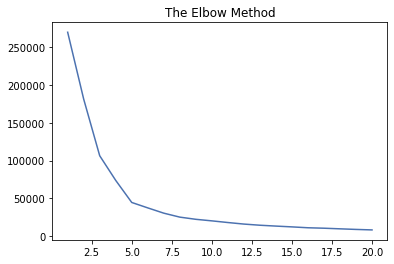

In [11]:
plt.figure()
plt.plot(range(1,21), wcss)
plt.title('The Elbow Method')
plt.show()

In [12]:
k=5
kmeans = KMeans(n_clusters =k)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3,
       1, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 2, 4, 3, 4, 2, 4, 2, 4,
       3, 4, 2, 4, 2, 4, 2, 4, 2, 4, 3, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

In [14]:
Group_cluster=pd.DataFrame(y_kmeans)
Group_cluster.columns=['Group']
full_data = pd.concat([data, Group_cluster], axis=1)
full_data

,ID,Gender,Age,Income,Spend,Group
0,1,Male,19,15,39,1
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,2
197,198,Male,32,126,74,4
198,199,Male,32,137,18,2


In [15]:
kmeans_pred = KMeans(n_clusters=k, random_state=42).fit(X)
kmeans_pred.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

In [16]:
kmeans_pred.predict([[100,50], [30, 80]])

array([4, 3])

In [17]:
labels = [('Cluster' + str(i+1)) for i in range(k)]
labels

['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4', 'Cluster5']

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

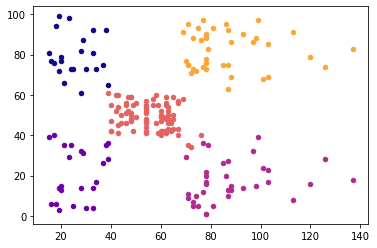

In [21]:
X= np.array(X)
plt.figure()
for i in range(k) :
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i ,1], s=20,
               c= cmap(i/k), label = labels[i])

In [25]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [26]:
iris = pd.read_csv('iris.csv')

In [27]:
x_iris = iris.drop(['class'],axis=1)
y_iris = iris['class']


In [28]:
x_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
from sklearn.preprocessing import Standard